# 环境

In [12]:
import numpy as np
import os
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fft import fft, fftfreq
from scipy.stats import skew, kurtosis, ttest_ind, ttest_rel
import re

# 读取数据

In [30]:
def data_read (file):
    file='C:/Users/lenovo/Desktop/sexy_lady/sexy_lady/data/eric/tmp/eric_high/high_01.txt'

    data = []
    with open(file, 'r') as f:
        raw =  f.readlines()
        for d in raw:
            temp = np.array(d.split(",")[2:27])
            for num in temp:
                data.append(float(num))

    return data

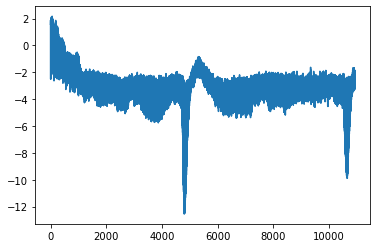

In [52]:
# 读取不同通道
ch1 = data[0::5]
ch2 = data[1::5]
ch3 = data[2::5]
ch4 = data[3::5]
ch5 = data[4::5]
plt.plot(data)

# 滤波

In [43]:
def notch_filter(data):
    b0,a0 = signal.butter(4, [47.5, 52.5], 'bandstop', fs=250)  #陷波滤波
    data_filt0 = signal.filtfilt(b0, a0, data)

    
    b1,a1 = signal.butter(4, [97.5, 102.5], 'bandstop', fs=250) #陷波滤波
    notch_filter_data = signal.filtfilt(b1, a1, data_filt0)
    return notch_filter_data

In [53]:
def bandpass_filter(notch_filter_data):
    b,a=signal.butter(4,[0.5,32],'bandpass',fs=250)  #带通滤波
    band_filter_data=signal.filtfilt(b,a,notch_filter_data)
    return band_filter_data 

# FFT

NameError: name 'xf' is not defined

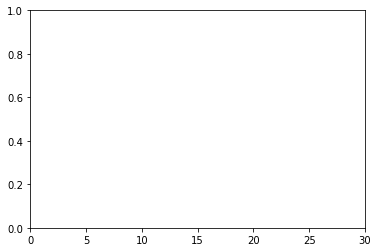

In [63]:
def FFT(data, N, T):
    yf = fft(band_filter_data )
    xf = fftfreq(N, T)[:N//2]
    
plt.clf()
plt.xlim(0,30)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.show()
